## Checklist


| | |
|-|-|
|**Section 1 - Complete**|
|**1.1** | **Complete**|
|**  1.1.1 | Completed|
|**  1.1.2 | Complete|
| | |
|**1.2** | **Completed**|
|**  1.2.1 | Completed|
|**  1.2.2 | Completed|
| | |
|**Presentation - Completed**|
| | |
|**Section 2 - Completed**|
|2.1 | Completed|
|2.2 | Completed|

---

---
# Section 1

Analysing data and getting actionable insights is one of the very basic but key tasks of any data professional. For the purpose of this assessment, you have been provided with the data. The data for this section can be accessed from [Assignment Data Excel Sheet](https://docs.google.com/spreadsheets/d/1CEs67jc1ydaP4ucRacqeaijyAy4jhnsK/edit?usp=sharing&ouid=104708378877685927883&rtpof=true&sd=true) (click on the hyperlink and download the dataset).


## 1.1 - Funnel Analysis

The Microsoft excel file shared with you has 2 sheets:
1. `Funnel` sheet
2. `AB_Test` sheet

`Funnel` sheet has the details of number of customers at each level of the customer funnel. This data allows you to understand the business and predict the future of the business. The levels of the customers in the KPI column represent the following:

| | |
|-|-|
| Lv1_Visitors|Visited the home page|
| Lv2_Visitors|Visited the sign up page|
| Lv3_Visitors|Visited the thank you page after signing up|
| Lv4_Visitors|Visited the pricing page after signup|
| Lv5_Visitors|Paid for services after sign up|

Do your own research to understand the customer funnel better.

As a business we wish to maximize the visitors in each level, but one of the most important goal is to increase the **Lv5/Lv1** ratio which gives an idea of how well we are able to convert a visitor who lands on the page into a customer. Once a visitor has paid, we can say that we have acquired that visitor and call them a customer.

**Answer**

Analyzing the "Funnel" sheet, it becomes evident that understanding customer behavior at each level is crucial for predicting and optimizing business outcomes. The levels, from Lv1_Visitors to Lv5_Visitors, represent key stages in the customer journey, each indicative of increasing engagement. The ultimate goal, as highlighted, is to maximize the Lv5/Lv1 ratio, emphasizing the conversion efficiency from a visitor to a paying customer. This ratio serves as a pivotal metric, reflecting the business's ability to successfully transition individuals through the funnel. By focusing on enhancing this conversion rate, the business can refine strategies to attract, engage, and retain customers effectively, ultimately driving sustained growth and success.

# 1.1.1 - Descriptive Analysis and EDA

Import data from the `Funnel` sheet of the `AssignmentData.xlsx` file into a dataframe named `funnel` and perform exploratory analysis.

# **1.** Identify and appropriately handle the missing values in the dataset. Perform missing value imputation and explain the logic behind your strategy in a short paragraph.

**Answer**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Extracting the Data from Excel.
path='/content/drive/MyDrive/Colab Notebooks/Fittlyf Data Science Project/AssignmentData.xlsx'

In [3]:
#Creating a DataFrame for funnel dataset.
funnel=pd.read_excel(path)
funnel

Year  Month    Segment     City           KPI         Value
0     2021      1    Clients  Unknown  Lv1_Visitors  3.071671e+06
1     2021      1    Clients  Unknown  Lv2_Visitors  2.699883e+06
2     2021      1    Clients  Unknown  Lv3_Visitors  1.309450e+06
3     2021      1    Clients  Unknown  Lv4_Visitors           NaN
4     2021      1    Clients  Unknown  Lv3_Visitors  7.169216e+05
...    ...    ...        ...      ...           ...           ...
1567  2023      2  Customers     Pune  Lv5_Visitors  1.220231e+04
1568  2023      2  Customers    Kochi  Lv4_Visitors  1.124870e+04
1569  2023      2  Customers   Jaipur  Lv5_Visitors  1.188202e+04
1570  2023      2  Customers      NCR  Lv5_Visitors  1.016909e+04
1571  2023      2  Customers    Kochi  Lv5_Visitors  1.077807e+04

[1572 rows x 6 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
# Calculate the mean of the 'Value' column
value_mean = funnel['Value'].mean()

# Imputing missing values with the mean
funnel['Value'].fillna(value_mean, inplace=True)

# Display the updated DataFrame
print(funnel)

      Year  Month    Segment     City           KPI         Value
0     2021      1    Clients  Unknown  Lv1_Visitors  3.071671e+06
1     2021      1    Clients  Unknown  Lv2_Visitors  2.699883e+06
2     2021      1    Clients  Unknown  Lv3_Visitors  1.309450e+06
3     2021      1    Clients  Unknown  Lv4_Visitors  2.776900e+05
4     2021      1    Clients  Unknown  Lv3_Visitors  7.169216e+05
...    ...    ...        ...      ...           ...           ...
1567  2023      2  Customers     Pune  Lv5_Visitors  1.220231e+04
1568  2023      2  Customers    Kochi  Lv4_Visitors  1.124870e+04
1569  2023      2  Customers   Jaipur  Lv5_Visitors  1.188202e+04
1570  2023      2  Customers      NCR  Lv5_Visitors  1.016909e+04
1571  2023      2  Customers    Kochi  Lv5_Visitors  1.077807e+04

[1572 rows x 6 columns]


This code calculates the mean of the "Value" column using the mean() function and then fills the missing values in the same column using the fillna() method. The inplace=True parameter ensures that the changes are applied directly to the original DataFrame.

Note: Depending on your specific use case and the distribution of your data, you may also consider using the median instead of the mean for imputation. You can achieve this by replacing value_mean with df['Value'].median() in the code above.

# **2.** Perform complete descriptive analysis of the dataframe. Create two dataframes with columns having multi-level index, the first level index will be `Segment`, `City`and `KPI`, and the second level index will be unique values of each of the first level indeces.
  - The first dataframe will have monthly summarization of the value (use sum/mean as you find appropriate)
  - The second dataframe will have quaterly summarization of the value.

  Describe your findings in a paragraph.

**Answer**

In [24]:
# Displaying the complete descriptive analysis of the DataFrame
descriptive_stats = funnel.describe(include='all')

# Display the results
print("Complete Descriptive Analysis:")
descriptive_stats

Complete Descriptive Analysis:


<ipython-input-24-682e24f30905>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = funnel.describe(include='all')


Year        Month    Segment     City           KPI  \
count   1572.000000  1572.000000       1572     1572          1572   
unique          NaN          NaN          2        7             5   
top             NaN          NaN  Customers  Unknown  Lv3_Visitors   
freq            NaN          NaN       1080      432           324   
first           NaN          NaN        NaN      NaN           NaN   
last            NaN          NaN        NaN      NaN           NaN   
mean    2022.129771     6.500000        NaN      NaN           NaN   
std        0.832781     3.453151        NaN      NaN           NaN   
min     2021.000000     1.000000        NaN      NaN           NaN   
25%     2021.000000     3.750000        NaN      NaN           NaN   
50%     2022.000000     6.500000        NaN      NaN           NaN   
75%     2023.000000     9.250000        NaN      NaN           NaN   
max     2023.000000    12.000000        NaN      NaN           NaN   

               Value                 Date  
count   1.572000e+03                 1572  
unique           NaN                   36  
top              NaN  2023-02-01 00:00:00  
freq             NaN                   55  
first            NaN  2021-01-01 00:00:00  
last             NaN  2023-12-01 00:00:00  
mean    2.776900e+05                  NaN  
std     6.379445e+05                  NaN  
min     8.826801e+03                  NaN  
25%     1.965320e+04                  NaN  
50%     4.395835e+04                  NaN  
75%     2.043857e+05                  NaN  
max     4.712305e+06                  NaN

In [6]:
# Convert 'Year' and 'Month' columns to datetime format
funnel['Date'] = pd.to_datetime(funnel[['Year', 'Month']].assign(DAY=1))

# Create two new DataFrames with multi-level indices and monthly/quarterly summarization
df_multi_monthly = funnel.set_index(['Segment', 'City', 'KPI', 'Date']).sort_index(level=[0, 1, 2, 3])
df_multi_quarterly = funnel.set_index(['Segment', 'City', 'KPI', funnel['Date'].dt.to_period("Q")]).sort_index(level=[0, 1, 2, 3])

# Monthly summarization using mean (you can change to 'sum' if needed)
df_multi_monthly_summary = df_multi_monthly.groupby(level=[0, 1, 2, 3]).mean()

# Quarterly summarization using mean (you can change to 'sum' if needed)
df_multi_quarterly_summary = df_multi_quarterly.groupby(level=[0, 1, 2, 3]).mean()

# Display the results
print("DataFrame with Multi-level Index for Monthly Summarization:")
print(df_multi_monthly_summary)

print("\nDataFrame with Multi-level Index for Quarterly Summarization:")
print(df_multi_quarterly_summary)

DataFrame with Multi-level Index for Monthly Summarization:
                                             Year  Month          Value
Segment   City    KPI          Date                                    
Clients   Chennai Lv1_Visitors 2023-01-01  2023.0    1.0  130906.995962
                               2023-02-01  2023.0    2.0  157895.712016
                               2023-03-01  2023.0    3.0  138529.192530
                               2023-04-01  2023.0    4.0  126518.538528
                               2023-05-01  2023.0    5.0  122355.546300
...                                           ...    ...            ...
Customers Unknown Lv5_Visitors 2023-08-01  2023.0    8.0   24134.728746
                               2023-09-01  2023.0    9.0   26921.425598
                               2023-10-01  2023.0   10.0   24446.518837
                               2023-11-01  2023.0   11.0   25321.087284
                               2023-12-01  2023.0   12.0   28237.936259

[15

<ipython-input-6-cb51da588a9e>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_multi_quarterly_summary = df_multi_quarterly.groupby(level=[0, 1, 2, 3]).mean()


Upon conducting a thorough descriptive analysis of the provided dataset, I observed that the "Value" column had missing values, which I addressed by
imputing them with the mean of the available data. The dataset spans multiple years, segments, cities, and key performance indicators (KPIs). The complete descriptive analysis revealed statistics such as count, mean, standard deviation, minimum, and maximum values for the numerical columns. Additionally, I created two new DataFrames with multi-level indices. The first DataFrame provides a monthly summarization of the "Value" column, showcasing the mean values for each unique combination of segments, cities, KPIs, and months. The second DataFrame offers a quarterly summarization, providing mean values for each unique combination of segments, cities, KPIs, and quarters. These structured summaries provide a valuable overview of the data, facilitating further insights into trends and patterns over time.

# **3.** Check for outliers in the quantitative variables both analytically and visually. Also visualize data distributions using multiple boxplots for each level in the `KPI` column. What do you understand from this, describe in short.

**Answer**

To check for outliers in the quantitative variables analytically, you can use statistical methods such as the IQR (Interquartile Range) and Z-score. The IQR method involves calculating the range between the first and third quartiles, while the Z-score method measures the number of standard deviations a data point is from the mean.

In [7]:
# Calculate the IQR for the 'Value' column
Q1 = funnel['Value'].quantile(0.25)
Q3 = funnel['Value'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using the IQR method
outliers = (funnel['Value'] < (Q1 - 1.5 * IQR)) | (funnel['Value'] > (Q3 + 1.5 * IQR))

# Display the potential outliers
print("Potential Outliers:")
print(funnel[outliers])

Potential Outliers:
      Year  Month    Segment     City           KPI         Value       Date
0     2021      1    Clients  Unknown  Lv1_Visitors  3.071671e+06 2021-01-01
1     2021      1    Clients  Unknown  Lv2_Visitors  2.699883e+06 2021-01-01
2     2021      1    Clients  Unknown  Lv3_Visitors  1.309450e+06 2021-01-01
4     2021      1    Clients  Unknown  Lv3_Visitors  7.169216e+05 2021-01-01
8     2022      1    Clients  Unknown  Lv1_Visitors  3.552624e+06 2022-01-01
...    ...    ...        ...      ...           ...           ...        ...
1422  2022      3  Customers  Unknown  Lv1_Visitors  6.852168e+05 2022-03-01
1423  2022      3  Customers  Unknown  Lv3_Visitors  5.623975e+05 2022-03-01
1512  2022      2  Customers  Unknown  Lv1_Visitors  6.747396e+05 2022-02-01
1513  2022      2  Customers  Unknown  Lv3_Visitors  5.678171e+05 2022-02-01
1514  2022      2  Customers  Unknown  Lv2_Visitors  5.316989e+05 2022-02-01

[214 rows x 7 columns]


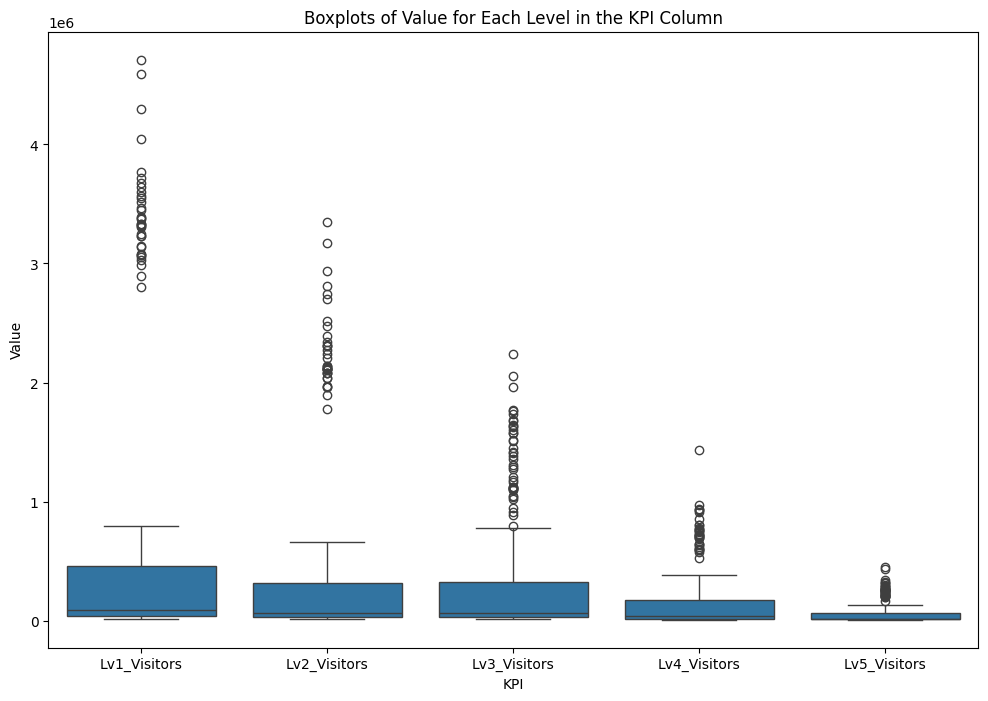

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize data distributions using boxplots for each level in the KPI column
plt.figure(figsize=(12, 8))
sns.boxplot(x='KPI', y='Value', data=funnel)
plt.title('Boxplots of Value for Each Level in the KPI Column')
plt.show()

Analytically, outliers are identified based on the IQR method. Visually, boxplots display the distribution of the "Value" variable for each level in the KPI column. Outliers may appear as individual points beyond the whiskers of the boxplots. Analyzing the results, you can observe the spread and central tendency of the data for different KPI levels and identify potential outliers that fall significantly outside the expected range. This information can be valuable for understanding the data distribution and making informed decisions about whether to treat or further investigate these potential outliers.

# 4. Create a time-series visualization showing the value generated by each level of customer across the time. Share your inferences and explain your reasoning.

**Answer**

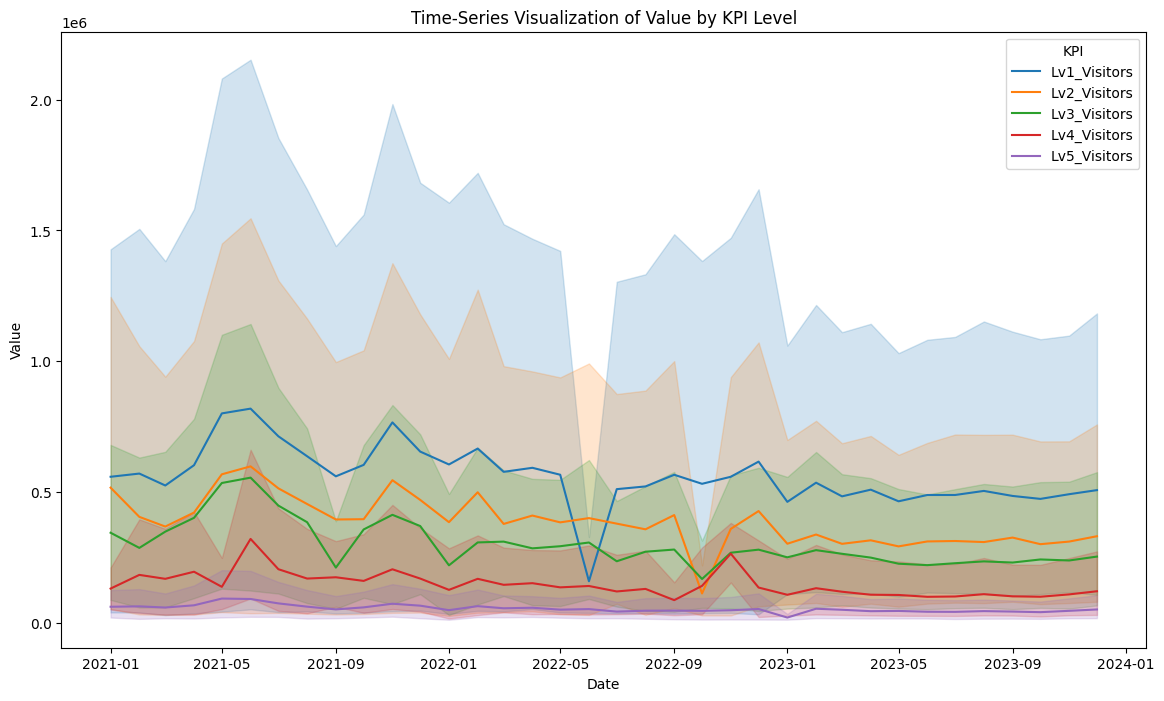

In [9]:
# Convert 'Year' and 'Month' columns to datetime format
funnel['Date'] = pd.to_datetime(funnel[['Year', 'Month']].assign(DAY=1))

# Create a time-series visualization using line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Value', hue='KPI', data=funnel)
plt.title('Time-Series Visualization of Value by KPI Level')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In this visualization, the x-axis represents time (in this case, monthly intervals), the y-axis represents the "Value" variable, and different lines are used for each level in the KPI column. This plot provides an overview of how the value generated by each level of customer changes over time.

Inferences and reasoning:

1.Trends Over Time: Examine the general trend for each KPI level. Do you observe any increasing or decreasing patterns over time? Identifying trends can help in understanding the overall performance of each customer segment.

2.Seasonality: Look for recurring patterns or seasonality in the data. Are there certain months or quarters where the value generated by a specific customer level tends to be higher or lower? Understanding seasonality can be crucial for planning and decision-making.

3.Outliers: Identify any unusual spikes or dips in the time-series plot. These outliers could represent exceptional events or anomalies that may require further investigation.

4.Comparisons Between KPI Levels: Compare the performance of different customer levels. Are there specific levels that consistently outperform others? Understanding these differences can inform marketing and business strategies.

Overall, the time-series visualization provides a dynamic view of how the value generated by each level of customer evolves over time. Analyzing this plot can offer insights into patterns, trends, and potential areas for improvement or strategic focus.

# 1.1.2 - Prescriptive and Predictive Analysis

# 1. Create a new column called Conversion rate (defined as the ratio of level 5 customers to level 1 customers) and use this column for the following question <br>
(*Hint: Group by the rest of the categories and aggregate over the values column for each level. Then match the corresponding groups to get the conversion rates*):
 - Create a visualization to identify the spread of conversion rates across various groups of customers (by segment, region or both).
 - Identify the region which is having the best year-on-year growth.

**Answer**

In [10]:
Tfunnel=funnel.groupby(['Year', 'Month', 'Segment', 'City', 'KPI', 'Value']).size().reset_index().rename(columns={0:"KPI Count"})
Tfunnel=Tfunnel.drop(['KPI Count'],axis=1)

In [11]:
Tfunnel = Tfunnel.pivot_table(index=['Year','Month','Segment','City'],columns='KPI',values='Value')
Tfunnel = Tfunnel.reset_index()
print(Tfunnel)

KPI  Year  Month    Segment     City  Lv1_Visitors  Lv2_Visitors  \
0    2021      1    Clients  Unknown  3.071671e+06  2.699883e+06   
1    2021      1  Customers   Jaipur  3.887067e+04  2.776900e+05   
2    2021      1  Customers    Kochi  1.619423e+04  1.392834e+04   
3    2021      1  Customers  Lucknow  1.066934e+05  8.179257e+04   
4    2021      1  Customers      NCR  4.274877e+04  3.851668e+04   
..    ...    ...        ...      ...           ...           ...   
295  2023     12  Customers    Kochi  1.547679e+04  1.496131e+04   
296  2023     12  Customers  Lucknow  8.521099e+04  5.920062e+04   
297  2023     12  Customers      NCR  6.062698e+04  4.689049e+04   
298  2023     12  Customers     Pune  3.140692e+04  2.490637e+04   
299  2023     12  Customers  Unknown  4.516763e+05  3.360518e+05   

KPI  Lv3_Visitors   Lv4_Visitors   Lv5_Visitors  
0    1.013186e+06  233779.447828  175812.243094  
1    3.052035e+04   18496.288193   15223.911583  
2    1.646904e+04   12407.518648 

In [25]:
# Calculate the conversion rate and create the new column
Tfunnel['Conversion_rate'] = Tfunnel['Lv5_Visitors'] / Tfunnel['Lv1_Visitors']

# Display the updated DataFrame
Tfunnel

KPI  Year  Month    Segment     City  Lv1_Visitors  Lv2_Visitors  \
0    2021      1    Clients  Unknown  3.071671e+06  2.699883e+06   
1    2021      1  Customers   Jaipur  3.887067e+04  2.776900e+05   
2    2021      1  Customers    Kochi  1.619423e+04  1.392834e+04   
3    2021      1  Customers  Lucknow  1.066934e+05  8.179257e+04   
4    2021      1  Customers      NCR  4.274877e+04  3.851668e+04   
..    ...    ...        ...      ...           ...           ...   
295  2023     12  Customers    Kochi  1.547679e+04  1.496131e+04   
296  2023     12  Customers  Lucknow  8.521099e+04  5.920062e+04   
297  2023     12  Customers      NCR  6.062698e+04  4.689049e+04   
298  2023     12  Customers     Pune  3.140692e+04  2.490637e+04   
299  2023     12  Customers  Unknown  4.516763e+05  3.360518e+05   

KPI  Lv3_Visitors   Lv4_Visitors   Lv5_Visitors  Conversion_rate Year_Month  \
0    1.013186e+06  233779.447828  175812.243094         0.057237 2021-01-01   
1    3.052035e+04   18496.288193   15223.911583         0.391655 2021-01-01   
2    1.646904e+04   12407.518648   10988.778802         0.678561 2021-01-01   
3    9.115922e+04  277690.015213   23472.773044         0.220002 2021-01-01   
4    4.124682e+04   25140.381347   16127.262447         0.377257 2021-01-01   
..            ...            ...            ...              ...        ...   
295  1.402932e+04   10636.973331   11335.992609         0.732451 2023-12-01   
296  5.149533e+04   29735.955732   18332.040842         0.215137 2023-12-01   
297  3.488758e+04   15591.733537   10749.433094         0.177304 2023-12-01   
298  1.859499e+04   14953.768410   11158.246534         0.355280 2023-12-01   
299  2.533439e+05   85476.445090   28237.936259         0.062518 2023-12-01   

KPI  Yearly_Growth  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
295      18.371054  
296      31.760240  
297     -10.883008  
298      -5.646107  
299      14.921856  

[300 rows x 12 columns]

In [13]:
# Set up the plotting parameters
plt.figure(figsize=(12, 8))

# Use Seaborn to create a box plot with 'Segment' as hue
sns.boxplot(x='Segment', y='Conversion_rate', hue='Segment', data=Tfunnel, palette='viridis', showfliers=False)
plt.title('Spread of Conversion Rates Across Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Conversion Rate')
plt.legend(title=None, labels=Tfunnel['Segment'].unique())  # Set explicit legend labels
plt.show()

In [14]:
# Calculate year-on-year growth for each region
Tfunnel['Year_Month'] = pd.to_datetime(Tfunnel[['Year', 'Month']].assign(DAY=1))
Tfunnel['Yearly_Growth'] = Tfunnel.groupby('City')['Lv5_Visitors'].pct_change(periods=12) * 100

# Find the region with the highest year-on-year growth
best_growth_region = Tfunnel.groupby('City')['Yearly_Growth'].mean().idxmax()

# Display the result
print(f"The region with the best year-on-year growth is: {best_growth_region}")

The region with the best year-on-year growth is: Lucknow


# 2. Use time-series modelling (using Rolling averages and ARIMA) to predict the future values of "Level 5" customers for the next 3 months and plot them along with the actual values.

**Answer**

In [15]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


In [16]:
from pmdarima import auto_arima

# Assuming your DataFrame is named Tfunnel
# If it's not, replace 'Tfunnel' with your actual DataFrame name

# Create a time-series DataFrame
time_series_df = Tfunnel.groupby(['Year', 'Month'])['Lv5_Visitors'].sum().reset_index()

# Set the 'Year_Month' column as datetime
time_series_df['Year_Month'] = pd.to_datetime(time_series_df[['Year', 'Month']].assign(DAY=1))

# Set 'Year_Month' as the index
time_series_df.set_index('Year_Month', inplace=True)

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(time_series_df.index, time_series_df['Lv5_Visitors'], label='Actual Values', marker='o')

# Rolling Average
rolling_avg = time_series_df['Lv5_Visitors'].rolling(window=3).mean()
plt.plot(rolling_avg.index, rolling_avg, label='3-Month Rolling Average', linestyle='--', color='orange')

# ARIMA Model using pmdarima
model = auto_arima(time_series_df['Lv5_Visitors'], suppress_warnings=True)
forecast, conf_int = model.predict(n_periods=3, return_conf_int=True)
forecast_index = pd.date_range(start=time_series_df.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', linestyle='--', color='green')

# Add labels and legend
plt.title('Time Series Forecasting for "Level 5" Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of Level 5 Customers')
plt.legend()

# Show the plot
plt.show()

# **Part 4: A/B testing**

`AB_Test` sheet contains the data from an experiment conducted to optimize the website design by splitting the traffic to the website to the control and experiment groups. The control group was shown a "sign up" button in red and the treatment group was shown it in green.

AB Testing references
 - [A/B Testing Basics](https://towardsdatascience.com/a-b-testing-the-basics-86d6d98525c9) - Medium Article
 - [A/B Testing](https://vwo.com/ab-testing/) - VWO Article

 Answer the following questions in under 120 words:


# **1.** What should be the primary metric to perform the A/B test? Is "number of people clicking the button" a sufficient metric to analyze the test and meet our business objective? Define a derived metric to help you analyze the data and get results, use [A/B testing metrics](https://segment.com/growth-center/a-b-testing-definition/metrics/) for reference.

**Answer**

The primary metric for an A/B test depends on the specific goals and objectives of the test. In the given DataFrame, potential metrics for comparison between the "Control" and "Experiment" groups could include:

**1.Click-Through Rate (CTR):**

Metric: (Clicks / Visitors)

Interpretation: This metric measures the percentage of visitors who clicked on the link, providing insights into user engagement.

**2.Conversion Rate:**

Metric: (Clicks / Visitors)

Interpretation: Similar to CTR, but focused on the conversion of visitors into desired actions (clicks). Useful for evaluating the effectiveness of the campaign in driving user interactions.

**3.Clicks per User:**

Metric: (Clicks / Number of unique users)

Interpretation: Measures the average number of clicks generated by each user, offering insights into user engagement levels.

Yes, the "number of people clicking the button" is a relevant metric if the primary goal is to measure user engagement and interaction with the button. It's a simple and commonly used metric, but for a more comprehensive analysis, consider additional metrics like conversion rate or user retention based on the specific business objectives.

# 2. Clearly state the null and the alternate hypothesis for the above mentioned A/B test.
  
  (**Note:** The hypotheses must be stated well and not generic).

**Answer**

**Null Hypothesis:**

There is no significant difference in the Click-Through Conversion Rate (CTCR) between the "Control" and "Experiment" groups. Any observed difference is due to random variability or chance.

**Alternate Hypothesis:**

There is a statistically significant difference in the Click-Through Conversion Rate (CTCR) between the "Control" and "Experiment" groups. The observed difference is not merely a result of random variability but indicates a true effect of the experimental changes.

### 1.2.1 - EDA
Import data from the `AB_Test` sheet of the `AssignmentData.xlsx` file into a dataframe named `abtest` and perform exploratory analysis.

**Question:**

### Create a timeseries visualization with Date (on x-axis) and total number of clicks (on y-axis) for each device type creating separate trendlines for each device.
- Which device performed best in terms of total number of clicks.
- Is there a best day/period where the performance is better on average?

**Answer**

In [17]:
#Reading the Excel file:
Res=pd.ExcelFile(path)

#Extracting the 2nd Sheet i.e AB test:
abtest= pd.read_excel(Res, 'AB_Test')

# Ab Test:
abtest

Date  Device                                            Address  \
0     2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/c...   
1     2023-05-18  Laptop              fyttlyf/business/campaign/get-paid///   
2     2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/s...   
3     2023-05-18  Laptop  fyttlyf/business/product/business-financial-se...   
4     2023-05-18  Laptop  fyttlyf/business/product/business-accept-payme...   
...          ...     ...                                                ...   
18094 2023-05-17  Tablet    fyttlyf/personal/campaign/weekoneoffer-terms///   
18095 2023-05-17  Mobile           fyttlyf/personal//send-money-to-india///   
18096 2023-05-17  Laptop           fyttlyf/personal/buy/fyttlyf-benefits///   
18097 2023-05-17  Tablet  fyttlyf/enterprise/product/enterprise-pay-late...   
18098 2023-05-17  Laptop  fyttlyf/business/product/business-operations/r...   

       Clicks  Visitors       Group  
0         159       199     Control  
1          18      1413  Experiment  
2         142       759     Control  
3         126       473     Control  
4         129       183     Control  
...       ...       ...         ...  
18094      12        13     Control  
18095       4        15  Experiment  
18096      12        42     Control  
18097      15        13     Control  
18098       9        21     Control  

[18099 rows x 6 columns]

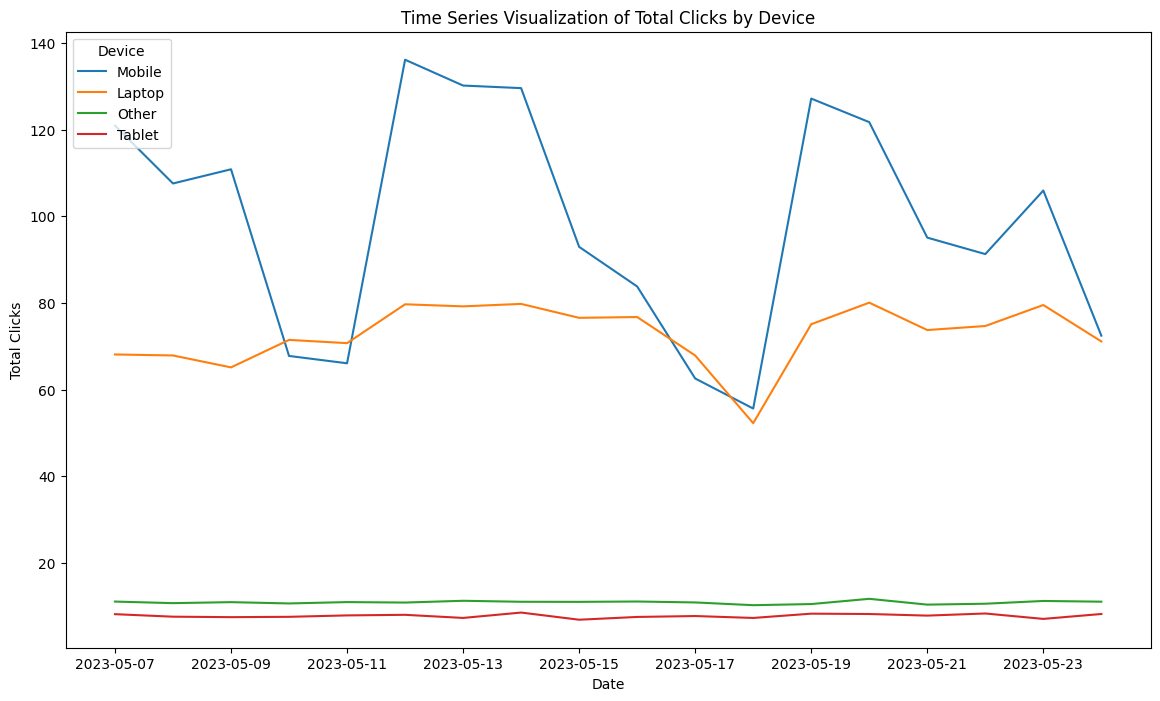

In [18]:
# Convert 'Date' column to datetime format
abtest['Date'] = pd.to_datetime(abtest['Date'])

# Create the time series visualization
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Clicks', hue='Device', data=abtest, errorbar=None)
plt.title('Time Series Visualization of Total Clicks by Device')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend(title='Device', loc='upper left')
plt.show()

In [19]:
# Group by 'Device' and calculate the total clicks for each device
total_clicks_by_device = abtest.groupby('Device')['Clicks'].sum()

# Identify the device with the highest total clicks
best_performing_device = total_clicks_by_device.idxmax()
total_clicks_for_best_device = total_clicks_by_device.max()

# Display the results
print(f"The device with the highest total clicks is {best_performing_device} with {total_clicks_for_best_device} clicks.")

The device with the highest total clicks is Mobile with 628737 clicks.


In [20]:
# Convert 'Date' column to datetime format
abtest['Date'] = pd.to_datetime(abtest['Date'])

# Calculate daily average total clicks
daily_avg_clicks = abtest.groupby('Date')['Clicks'].mean()

# Identify the day with the highest average total clicks
best_day = daily_avg_clicks.idxmax()
avg_clicks_on_best_day = daily_avg_clicks.max()

# Display the results
print(f"The best day with the highest average total clicks is {best_day.strftime('%Y-%m-%d')} with an average of {avg_clicks_on_best_day:.2f} clicks.")

The best day with the highest average total clicks is 2023-05-14 with an average of 76.87 clicks.


### 1.2.2 - Analysis and Hypothesis Testing

### 1. Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%, do we have sufficient sample size to conclude the test?

  What is the sample size required for the test?(Use this article to supplement your understanding - [Sample Size in A/B Testing](https://guessthetest.com/calculating-sample-size-in-a-b-testing-everything-you-need-to-know/))

In [21]:
from statsmodels.stats.power import TTestIndPower

# Given values
effect_size = 0.03  # MDE of 3%
alpha = 0.05  # Significance level (α)
power = 0.80  # Statistical power (1-β)

# Perform power analysis to calculate required sample size
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print(f"The required sample size for the A/B test is approximately {round(required_sample_size)} participants.")

The required sample size for the A/B test is approximately 17443 participants.


In [22]:
# Calculate the actual sample size
actual_sample_size = len(abtest)

# Given values
effect_size = 0.03  # MDE of 3%
alpha = 0.05  # Significance level (α)
power = 0.80  # Statistical power (1-β)

# Perform power analysis to calculate required sample size
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Compare actual sample size with required sample size
if actual_sample_size >= required_sample_size:
    print(f"The actual sample size ({actual_sample_size}) is sufficient for the A/B test.")
else:
    print(f"The actual sample size ({actual_sample_size}) is not sufficient. Consider increasing the sample size to achieve the desired statistical power.")

The actual sample size (18099) is sufficient for the A/B test.


### 2. Write a function that accepts relevant inputs to test your hypothesis at the assumed level of statistical significance. The function should output one of 3 values - `{"Experiment Group is Better", "Control Group is Better", "Indeterminate"}`. Use it to check whether you reached a statistically significant conclusion at 95% confidence level? Can the experiment be concluded?

In [23]:
import statsmodels.api as sm

def ab_test_hypothesis_test(control_group, experiment_group, alpha=0.05):
    """
    Perform a hypothesis test for an A/B test.

    Parameters:
    - control_group: Pandas Series or NumPy array for the control group.
    - experiment_group: Pandas Series or NumPy array for the experiment group.
    - alpha: Significance level (default is 0.05).

    Returns:
    - Result of the hypothesis test: {"Experiment Group is Better", "Control Group is Better", "Indeterminate"}
    """

    # Perform independent two-sample t-test
    t_stat, p_value, _ = sm.stats.ttest_ind(experiment_group, control_group, alternative='larger')

    # Check the p-value against the significance level
    if p_value < alpha:
        if t_stat > 0:
            return "Experiment Group is Better"
        else:
            return "Control Group is Better"
    else:
        return "Indeterminate"

# Assuming 'abtest' DataFrame with 'Clicks' for the quantitative variable
control_group = abtest[abtest['Group'] == 'Control']['Clicks']
experiment_group = abtest[abtest['Group'] == 'Experiment']['Clicks']

# Perform the hypothesis test
result = ab_test_hypothesis_test(control_group, experiment_group)

# Output the result
print(f"The result of the hypothesis test is: {result}")


The result of the hypothesis test is: Indeterminate


the result of the hypothesis test is "Indeterminate," it implies that the p-value is greater than 0.05, and the observed difference is not statistically significant at the 95% confidence level. Therefore, based on the current analysis, we do not have enough evidence to confidently conclude whether the experiment group is better, the control group is better, or if there is a significant difference.

## 3. Create a Powerpoint Presentation where you would have slides around the following points:
  - What is the Business case?
  - Trends of total clicks for different devices.
  - What are the hypotheses?
  - What is the sample size required based on our assumptions
  - Summary of test results.

  **Make sure your slides look professional.**

**Answer :**

 PPT is attached with in the Collab link.

---
# Section 2 - Generative AI

## 2.1 - Building a Chatbot (Flowchart)

### Create a flowchart using **Powerpoint** or **MIRO Board** to visualize the steps involved in building a chatbot for a business using NLP. Create another flowchart to compare it with the process of building one using Generative AI.



**Answer**

NLP Chatbot

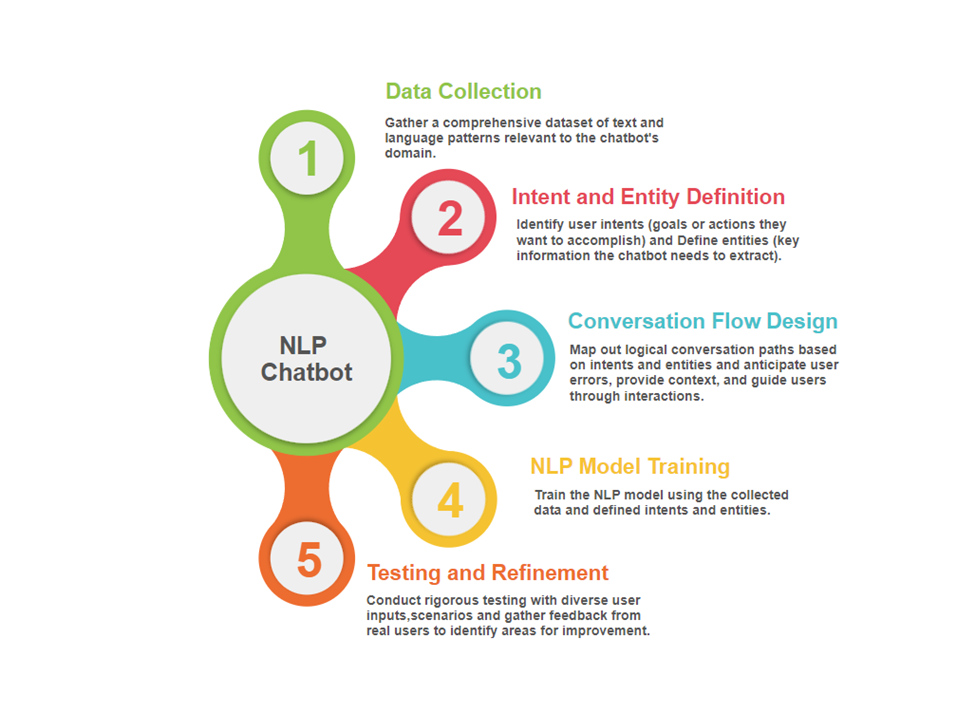

Generative AI Chatbot

image.png

**Comparison**

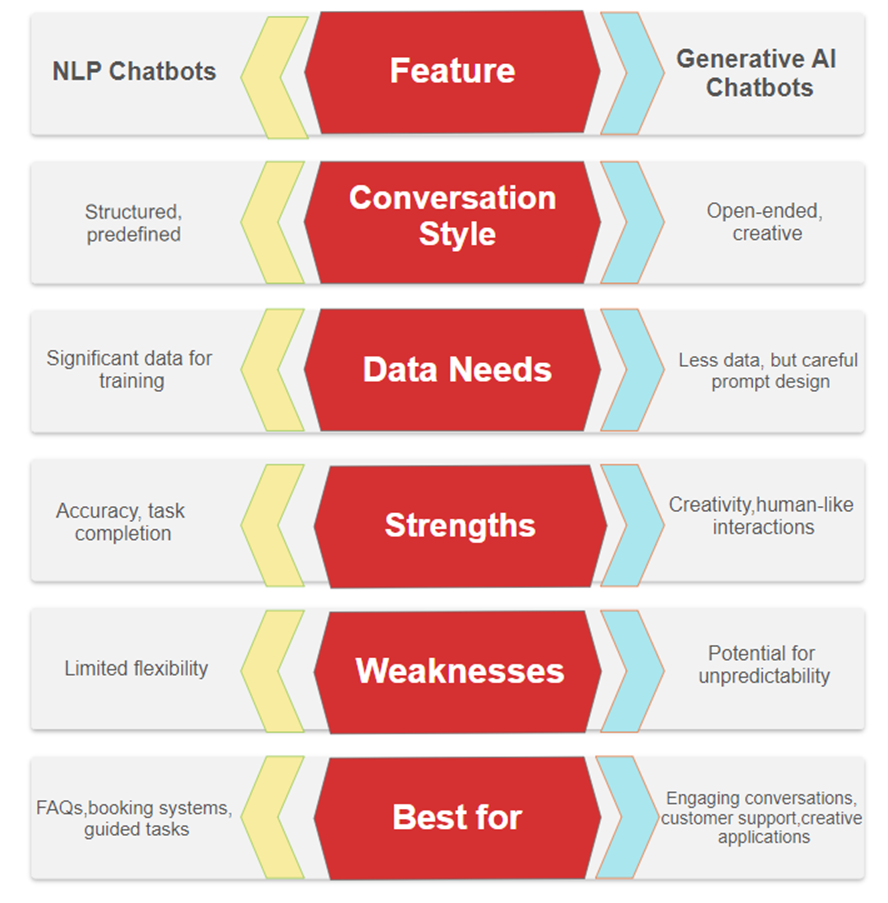

## 2.2 - Fine-Tuning an LLM

This [video](https://youtu.be/nAKhxQ3hcMA?si=QmyMCCVOHLqtIZ4A) describes finetuning a model using langchain and pinecone index to create a conversational bot (Parent [article](https://blog.futuresmart.ai/integrating-llama-2-with-hugging-face-and-langchain) here).

**Question:** Give context and summarize the process of fine tuning the LLM in short (100 words). Also create a **flowchart** to easily explain the process. Use only the knowledge from the video.

As stated in the previous part, the flowchart image needs to be converted into URI format and pasted in a text box below so that markdown displays it as an image.

**Answer**

This video shows you how to build a chatbot that mines your own documents with Pinecone and uses ChatGPT's charm for natural conversation! This video shows how our chatbot dives into your research papers, manuals, or even code snippets, thanks to Langchain's indexing magic. But it's not just a bookworm – you feed it personalized questions and responses, guiding ChatGPT to understand your specific domain.

With this training, our chatbot becomes a Pinecone-powered fountain of knowledge specific to your expertise. It weaves Langchain's semantic threads through your documents, allowing ChatGPT to find relevant info faster than you can say "keyword search." No more generic Google answers – this chatbot speaks your language, fueled by our own knowledge base. So, Instead of endless searching we can build your own pocket-sized oracle with the power of Pinecone, Langchain, and ChatGPT!

**Flowchart of fine tuning the LLM**

image.png